<a href="https://colab.research.google.com/github/BrockDSL/DASA_2021_Python_Collaboration/blob/main/DASAMachineLearningBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![DSL_logo](https://github.com/BrockDSL/Machine_Learning_with_Python/blob/master/dsl_logo.png?raw=1)

# Introduction to Machine Learning with Python


In our [Data Science](https://brockdsl.github.io/Python_2.0_Workshop/) workshop we introduced some concepts by looking at some fictional data about wine samples that were rated a quality score. In this session we are going to see if we can build a machine learning model to see if we can predict which wine sample is rated the highest quality based on the answers to some questions. 

As a further exercise we'll setup an example of a two layer neural network. I encourage you to try out this examples after class is done.



## First, a brief recap on Python code

The following code should look familiar to you

In [6]:
import pandas as pd

#Load the file into a dataframe using the pandas read_csv function
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

#Tell it what our columns are by passing along a list of that information
data.columns = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]

print("Poor Quality or High Quality?")
print(data.groupby("quality")["citric acid"].count())
print("\nTotal records:", len(data))


Poor Quality or High Quality?
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: citric acid, dtype: int64

Total records: 1599


## Machine Learning Basics

Don't let the impressive name fool you. Machine learning is more or less the following steps

1. Getting your data and cleaning it up
1. Identify what parts of your data are **features**
1. Identify what is your **target variable** that you'll guess based on your features
1. Split your data in **training and testing sets**
1. **Train** your model against the training set
1. **Validate** your model against the testing set
1. ????
1. Profit


We are going to use the Python library [scikit-learn](https://scikit-learn.org/stable/) and we are going to be doing a [classification](https://en.wikipedia.org/wiki/Statistical_classification) problem.

![classification](https://raw.githubusercontent.com/BrockDSL/Machine_Learning_with_Python/master/classification.png)


## Decision Tree

This is one of the most basic machine learning model you can use. It is considered a [supervised learning](https://en.wikipedia.org/wiki/Supervised_learning) method. You create the best [decision tree](https://en.wikipedia.org/wiki/Decision_tree_learning) that you can based on your training data. Here's an example tree that shows your chance of surviving the Titanic disaster. What we are creating is series of question that when answered will put observations into a _bucket_ or in other terms one of the classification options. We also devise a probability associated with an observation falling into that _bucket_.

The features are described by the labels, however ``sibsp`` - is the number of spouses or siblings on board.

![dtree](https://upload.wikimedia.org/wikipedia/commons/e/eb/Decision_Tree.jpg)


So in this tree the most important question to ask first is what is the gender of the person you are considering, then next most important question is age above 9 and a half, followed lastly by, does this person have less than three spouses or siblings on board.


Let's start by loading the Libraries we need

In [7]:

#This should look familar
import pandas as pd
#import numpy as np


#We'll draw a graph later on
import matplotlib.pyplot as plt

#Our 'Machine Learning pieces'
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
from sklearn import metrics 
from sklearn import tree


## Getting the data ready

Now, let's load our data. Our decision tree can only work with numerical values, so we'll have to modify the columns of data that are text based. As stated preparing the data is usually the most difficult part of the process.

In [15]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
data.columns = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Building and Running the Model

We now have our data cleaned up, and represented in a way that Scikit will be able to analyze. To be honest the most difficult part of the process is done.

We now need to split our columns in two types:
- **features** represent the data we use to build our guess
- **target variable** the thing our model hopes to guess

In [14]:
#all of the following columns are features, we'll make a list of their names
features = ["fixed acidity",\
            "volatile acidity",\
            "citric acid",\
            "residual sugar",\
            "chlorides",
            "free sulfur dioxide",\
            "total sulfur dioxide",\
            "density",
            "pH",\
            "sulphates",\
            "alcohol",\
            ]

X = data[features]

#We want to target the quality column
y = data.quality


## Training and testing

Now that we have built our model we need to get the data ready for it. We do this by breaking it into two different pieces. The diagram shows a conceptualization of how this is proportioned.

![Train Test Split](https://raw.githubusercontent.com/BrockDSL/Machine_Learning_with_Python/master/train_test.png)

- **Training set** this is what is used to build the model
- **Testing set** this is used to see if our guesses are correct

Before we were looking at the **columns** of the data, this investigation of training/testing looks at the **rows** of data.


In [16]:
#Training and test together make up 100% of the data!
#We start with a baseline of 30% of our data as testing

test_percent = 30
train_percent = 100 - test_percent

X_train, X_test, y_train, y_test = train_test_split(X, \
                                                    y, \
                                                    test_size=test_percent/100.0,
                                                   random_state=10)

Now the interesting part, we build our model, **train** it against the **training set** and see how it **predicts** against the **testing set**

In [31]:
# Create Decision Tree classifer object
treeClass = DecisionTreeClassifier()

# Train
treeClass = treeClass.fit(X_train,y_train)

#Predict
y_pred = treeClass.predict(X_test)


## Accuracy of the Model

To see how good our machine learning model is we need to see how accurate our predictions are. `Scikit` has built in functions and [metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) to do this for us.

In [19]:
print("Accuracy: ")
print(metrics.accuracy_score(y_test,y_pred))

Accuracy: 
0.60625



## Making Predictions

Not bad. We can use our model to predict a guess for **ill** if we pass along all of the other parameters. Our model only tells us if someone is ill or not. This is directly asking our classification model to give us a prediction based on a pretend record.

Since this classifier tells us if someone is ill or someone is not ill, it has two outputs.


In [ ]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [20]:
# I randomly picked a record in the dataset to test if the prediction is correct. 
# This is from line: 281 of the datafile
redwine_x_quality_of_8 = [
        10.3, #fixed acidity
        0.32, #volatile acidity
        0.45, #citric acid
        6.4, #residual sugar 
        0.073, #chlorides
        5, #free sulfur dioxide
        13, #total sulfur dioxide
        0.9976, #density
        3.23, #pH
        0.82, #sulphates
        12.6, #alcohol
]

redwine_x_quality_of_8 = pd.DataFrame([redwine_x_quality_of_8],columns=X_test.columns)

print("Red Wine with a quality of 8")
print("Class predicted by model: ")
print(treeClass.predict(redwine_x_quality_of_8))
print("Probablity associated with the guess: ")
print(treeClass.predict_proba(redwine_x_quality_of_8))



# I randomly picked a record in the dataset to test if the prediction is correct. 
# This is from line: 692 of the datafile
redwine_x_quality_of_3 = [
        7.4, #fixed acidity
        1.185, #volatile acidity
        0, #citric acid
        4.25, #residual sugar
        0.097, #chlorides
        5, #free sulfur dioxide
        14, #total sulfur dioxide
        0.9966, #density
        3.63, #pH
        0.54, #sulphates
        10.7, #alcohol
]

#Use the dataframe of our fictional person in our model and get our prediction
redwine_x_quality_of_3 = pd.DataFrame([redwine_x_quality_of_3],columns=X_test.columns)

print("\nRed Wine with a quality of 3")
print("Class predicted by model: ")
print(treeClass.predict(redwine_x_quality_of_3))
print("Probablity associated with the guess: ")
print(treeClass.predict_proba(redwine_x_quality_of_3))



Red Wine with a quality of 8
Class predicted by model: 
[7]
Probablity associated with the guess: 
[[0. 0. 0. 0. 1. 0.]]

Red Wine with a quality of 3
Class predicted by model: 
[3]
Probablity associated with the guess: 
[[1. 0. 0. 0. 0. 0.]]


With this model constucted we can make ask it question so to speak. We can provide it with details about a pretend person and see what classification the model will place this person.

## Q1 - Making a prediction with our model

Try to set some parameters in the `pretend_rw` variable below to make the prediction determine that the red wine has a quality of **8**. If you can find one please copy and paste it into the chat box for others to try. 

When you are done experiementing please type "Done" in the chat box. 

In [21]:
pretend_rw = pd.DataFrame([
        10.3, #fixed acidity
        0.32, #volatile acidity
        0.45, #citric acid
        6.4, #residual sugar 
        0.073, #chlorides
        5, #free sulfur dioxide
        13, #total sulfur dioxide
        0.9976, #density
        8.23, #pH - choose a value between 0-14
        0.82, #sulphates
        12.6, #alcohol
])


#turn our pretend redwine into a dataframe that is the correct dimensions
pretend_rw = pretend_rw.T 
pretend_rw.columns = X_test.columns

print("\Pretend redwine details")
print(pretend_rw.head())

print("Pretend redwine Class predicted")
print(treeClass.predict(pretend_rw))

print("Pretend redwine probablity of guess")
print(treeClass.predict_proba(pretend_rw))

\Pretend redwine details
   fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0           10.3              0.32         0.45  ...  8.23       0.82     12.6

[1 rows x 11 columns]
Pretend redwine Class predicted
[7]
Pretend redwine probablity of guess
[[0. 0. 0. 0. 1. 0.]]



## Visualizing our Decision Tree

We can 'visualize' the decision tree to trace through the decisions it makes. In this case we can tell that **income level** is the most important factor that we consider since we ask so many questions about that before looking at any of the other features.

In [ ]:
printed_tree = export_text(treeClass, features)
print(printed_tree)

## Tuning parameters - Testing Set Sizes

To make our models run better we can tweak _many, many, many_ different parameters. For example, we can vary the testing data size percentage. We'll try some different values and plot our our accuracy of our predictions.

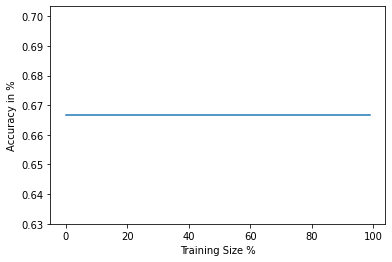

In [30]:
testing_percents = [1,5,10,20,30,100]
accuracy = []
training_percents = []

for test_ratio in testing_percents:
    X_train, X_test, y_train, y_test = train_test_split(X, \
                                                        y, \
                                                        test_size=test_percent/100.0,
                                                        random_state=10)
    treeClassTest = DecisionTreeClassifier()
    treeClassTest = treeClassTest.fit(X_train,y_train)
    y_pred = treeClassTest.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    accuracy.append(score)
    training_percents.append(100 - test_ratio)

    
plt.plot(training_percents,accuracy)
plt.ylabel("Accuracy in %")
plt.xlabel("Training Size %")
plt.show()

(Your graph might look different, this is a statistical operation and will probably vary across different machines)

## Tuning Parameters - Maximum depth of the tree

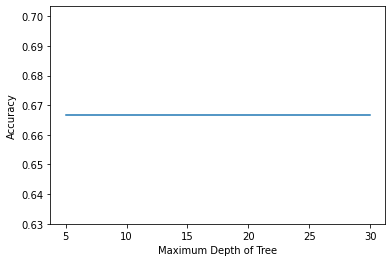

In [26]:
test_percent = 70
max_options = [5,10,15,20,25,30]

accuracy = []
tree_max = []

for max_d in max_options:
    X_train, X_test, y_train, y_test = train_test_split(X, \
                                                        y, \
                                                        test_size=test_percent/100.0,
                                                        random_state=10,
                                                       )
    
    #We set maximum depth in the DecisionTreeClassifer when we first create the variable
    treeClassTest = DecisionTreeClassifier(max_depth=max_d)
    treeClassTest = treeClassTest.fit(X_train,y_train)
    y_pred = treeClassTest.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    accuracy.append(score)
    tree_max.append(max_d)

    
plt.plot(max_options,accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Maximum Depth of Tree")
plt.show()

## Using a Machine Learning Network to detect pictures

In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  
import seaborn as sns
import tensorflow as tf
from tensorflow.python.framework import ops
from tensorflow.examples.tutorials.mnist import input_data
from PIL import Image

# Import Fashion MNIST
fashion_mnist = input_data.read_data_sets('input/data', 
        one_hot=True)

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) \
        = fashion_mnist.load_data()




class_names = ['T-shirt/top', 'Trouser', 
        'Pullover', 'Dress', 'Coat', 
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


train_images = train_images / 255.0

test_images = test_images / 255.0


# Prepare the training images
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)

# Prepare the test images
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)


model = tf.keras.Sequential()

input_shape = (28, 28, 1)
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(10, activation='softmax'))


model.compile(optimizer=tf.train.AdamOptimizer(), 
                      loss='sparse_categorical_crossentropy',
                                    metrics=['accuracy'])


model.fit(train_images, train_labels, epochs=5)

# test with 10,000 images
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('10,000 image Test accuracy:', test_acc)

#run test image from Fashion_MNIST data 

img = test_images[15]
img = (np.expand_dims(img,0))
singlePrediction = model.predict(img,steps=1)
print ("Prediction Output")
print(singlePrediction)
print()
NumberElement = singlePrediction.argmax()
Element = np.amax(singlePrediction)

print ("Our Network has concluded that the image number '15' is a "
        +class_names[NumberElement])
print (str(int(Element*100)) + "% Confidence Level")



## Introduction to Neural Networks

In [ ]:
# 2 Layer Neural Network in NumPy

import numpy as np

# X = input of our 3 input XOR gate
# set up the inputs of the neural network (right from the table)
X = np.array(([0,0,0],[0,0,1],[0,1,0], \
    [0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]), dtype=float)
# y = our output of our neural network
y = np.array(([1], [0],  [0],  [0],  [0], \
     [0],  [0],  [1]), dtype=float)

# what value we want to predict
xPredicted = np.array(([0,0,1]), dtype=float)

X = X/np.amax(X, axis=0) # maximum of X input array
# maximum of xPredicted (our input data for the prediction)
xPredicted = xPredicted/np.amax(xPredicted, axis=0) 

# set up our Loss file for graphing

lossFile = open("SumSquaredLossList.csv", "w")

class Neural_Network (object):
  def __init__(self):
    #parameters
    self.inputLayerSize = 3  # X1,X2,X3 
    self.outputLayerSize = 1 # Y1
    self.hiddenLayerSize = 4 # Size of the hidden layer

    # build weights of each layer
    # set to random values
    # look at the interconnection diagram to make sense of this
    # 3x4 matrix for input to hidden
    self.W1 = \
            np.random.randn(self.inputLayerSize, self.hiddenLayerSize) 
    # 4x1 matrix for hidden layer to output
    self.W2 = \
            np.random.randn(self.hiddenLayerSize, self.outputLayerSize) 

  def feedForward(self, X):
    # feedForward propagation through our network
    # dot product of X (input) and first set of 3x4  weights
    self.z = np.dot(X, self.W1) 

    # the activationSigmoid activation function - neural magic
    self.z2 = self.activationSigmoid(self.z) 

    # dot product of hidden layer (z2) and second set of 4x1 weights
    self.z3 = np.dot(self.z2, self.W2) 

    # final activation function - more neural magic
    o = self.activationSigmoid(self.z3) 
    return o

  def backwardPropagate(self, X, y, o):
    # backward propagate through the network
    # calculate the error in output
    self.o_error = y - o 

    # apply derivative of activationSigmoid to error
    self.o_delta = self.o_error*self.activationSigmoidPrime(o) 

    # z2 error: how much our hidden layer weights contributed to output error
    self.z2_error = self.o_delta.dot(self.W2.T) 

    # applying derivative of activationSigmoid to z2 error
    self.z2_delta = self.z2_error*self.activationSigmoidPrime(self.z2) 

    # adjusting first set (inputLayer --> hiddenLayer) weights
    self.W1 += X.T.dot(self.z2_delta) 
    # adjusting second set (hiddenLayer --> outputLayer) weights 
    self.W2 += self.z2.T.dot(self.o_delta) 

  def trainNetwork(self, X, y):
    # feed forward the loop
    o = self.feedForward(X)
    # and then back propagate the values (feedback)
    self.backwardPropagate(X, y, o)


  def activationSigmoid(self, s):
    # activation function
    # simple activationSigmoid curve as in the book
    return 1/(1+np.exp(-s))

  def activationSigmoidPrime(self, s):
    # First derivative of activationSigmoid
    # calculus time!
    return s * (1 - s)


  def saveSumSquaredLossList(self,i,error):
    lossFile.write(str(i)+","+str(error.tolist())+'\n')
    
  def saveWeights(self):
    # save this in order to reproduce our cool network
    np.savetxt("weightsLayer1.txt", self.W1, fmt="%s")
    np.savetxt("weightsLayer2.txt", self.W2, fmt="%s")

  def predictOutput(self):
    print ("Predicted XOR output data based on trained weights: ")
    print ("Expected (X1-X3): \n" + str(xPredicted))
    print ("Output (Y1): \n" + str(self.feedForward(xPredicted)))

myNeuralNetwork = Neural_Network()
trainingEpochs = 1000
#trainingEpochs = 100000

for i in range(trainingEpochs): # train myNeuralNetwork 1,000 times
  print ("Epoch # " + str(i) + "\n")
  print ("Network Input : \n" + str(X))
  print ("Expected Output of XOR Gate Neural Network: \n" + str(y))
  print ("Actual  Output from XOR Gate Neural Network: \n" + \
          str(myNeuralNetwork.feedForward(X)))
  # mean sum squared loss
  Loss = np.mean(np.square(y - myNeuralNetwork.feedForward(X))) 
  myNeuralNetwork.saveSumSquaredLossList(i,Loss)
  print ("Sum Squared Loss: \n" + str(Loss))
  print ("\n")
  myNeuralNetwork.trainNetwork(X, y)

myNeuralNetwork.saveWeights()
myNeuralNetwork.predictOutput()


## Congrats!

We have just scratched the surface with what is possible with Python and SciKit. Remember, don't let the name **Machine Learning** fool you. Most of the time the computer is making guesses based on past data. Sometimes this works good, sometimes it doesn't work so good!